# Data visualization

---

## Fundamentals of ETL: data extraction, transformation and loading


Applied Mathematical Modeling in Banking

---

# 1. The grammar of ggplot2 graphics


There is a basic grammar to all graphics production. In R‘s base graphics or in Excel, you feed ranges of data to a plot as x and y elements, then manipulate colors, scale dimensions and other parts of the graph as graphical elements or options.

ggplot2′s grammar makes a clear distinction between your data and what gets displayed on the screen or page. You feed ggplot2 your data, then apply a series of mappings and transformations to create a visual representation of that data. Even with base graphics or Excel we never really plot the data itself, we only create a representation; ggplot2 makes this distinction explicit. In addition, ggplot2′s structure makes it very easy to tweak a graph to look the way you want by adding mappings.

|Data||The raw data that you want to plot|
|---|---|---|
|Geometries|geom_|The geometric shapes that will represent the data.|
|Aethetics|aes()|Aesthetics of the geometric and statistical objects, such as color, size, shape and position.
|Scales|scale_|Maps between the data and the aesthetic dimensions, such as data range to plot width or factor values to colors

General syntax is looks like:

```
data
+ geometry to represent the data,
+ aesthetic mappings of data to plot coordinates like position, color and size
+ scaling of ranges of the data to ranges of the aesthetics
```

In [232]:
#install.packages('ggplot2')
library(ggplot2)

demo_data <- data.frame(XVal = sample(1:300, 300),
                       YVal = sample(1:300, 300),
                       Letter = as.factor(c("A", "B", "C")))
head(demo_data)

,XVal,YVal,Letter
,<int>,<int>,<fct>
1,43,19,A
2,175,155,B
3,133,250,C
4,280,203,A
5,202,3,B
6,149,286,C


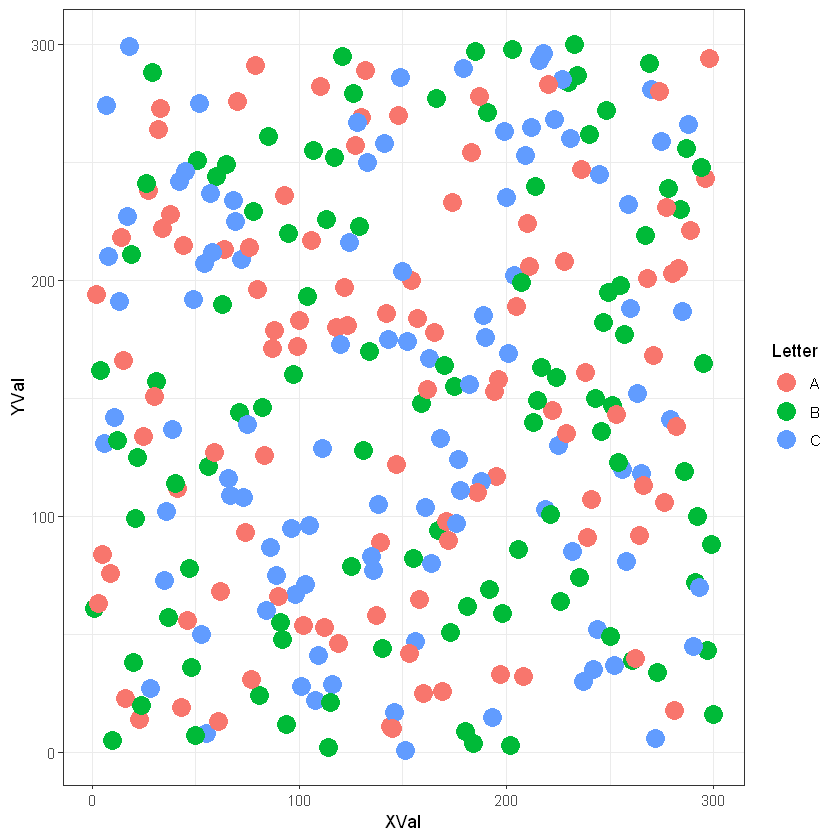

In [233]:
demo_plot <- ggplot(data = demo_data, # add data
                aes(x = XVal, y = YVal)) + # set axis data
                geom_point(aes(colour = Letter), size = 5) 
                # set form of presentation - point and color based on value of Letter
                # size = 15 - size of the point
 
# Display the plot
demo_plot

There are more advanced options to extend your charts with `ggplot2`. The above will get you a basic graph, but ggplot2 includes a few more parts of the grammar that you’ll want to be aware of as you try to visualize more complex data:

||||
|---|---|---|
|Statistical transformations|`stat_`|Statistical summaries of the data that can be plotted, such as quantiles, fitted curves (loess, linear models, etc.), sums and so o.|
|Coordinate systems|`coord_`|The transformation used for mapping data coordinates into the plane of the data rectangle.|
|Facets|`facet_`|The arrangement of the data into a grid of plots (also known as latticing, trellising or creating small multiples).|
|Visual Themes|`theme`|The overall visual defaults of a plot: background, grids, axe, default typeface, sizes, colors, etc.|

# 2. Dataset description

Dataset: https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex

Data description:

- [x] `Gender` : Male / Female
- [x] `Height` : Number (cm)
- [x] `Weight` : Number (Kg)
- [x] `Index` :  `0` - Extremely Weak,  `1` - Weak, `2` - Normal, `3` - Overweight, `4` - Obesity, `5` - Extreme Obesity

In [214]:
data_path <- "data/500_Person_Gender_Height_Weight_Index.csv"
index_data <- read.csv(data_path)
head(index_data)

,Gender,Height,Weight,Index
,<chr>,<int>,<int>,<int>
1,Male,174,96,4
2,Male,189,87,2
3,Female,185,110,4
4,Female,195,104,3
5,Male,149,61,3
6,Male,189,104,3


Lets plot Weight vs Height with basic `plot()` function:

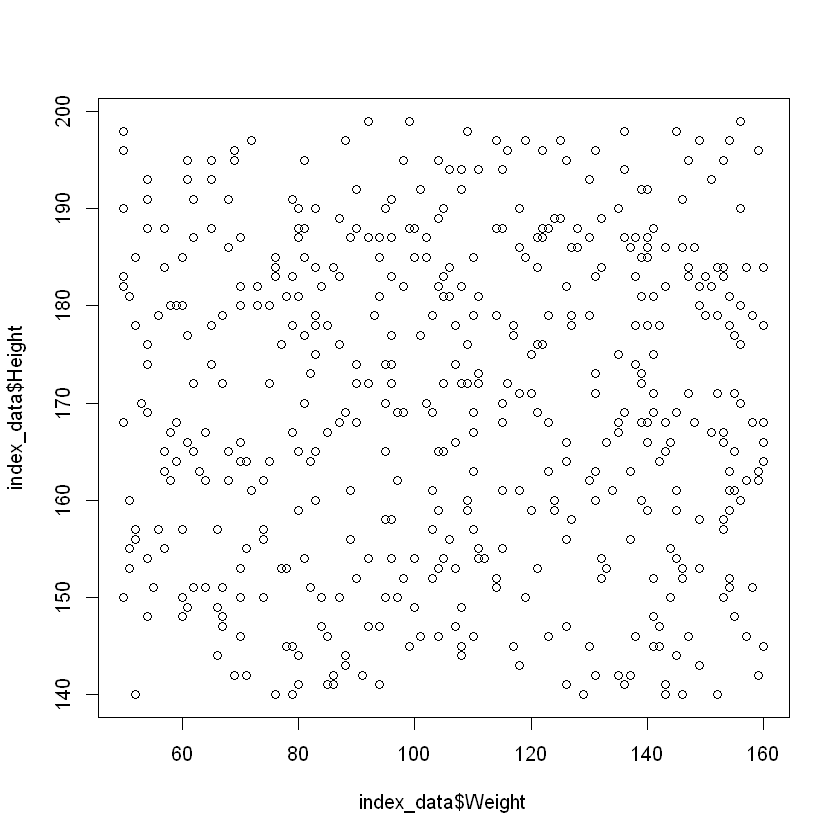

In [215]:
plot(index_data$Weight, index_data$Height)

# 3. Scatterplot

The most frequently used plot for data analysis is undoubtedly the scatterplot. Whenever you want to understand the nature of relationship between two variables, invariably the first choice is the scatterplot.

So, lets configure `ggplot2` and other packages before use

In [216]:
library(ggplot2) # load ggplot2
library(dplyr) # for quesries and filters
library(magrittr) # for pipe

options(scipen=999) # turn off scientific notation on numbers like 1e+24

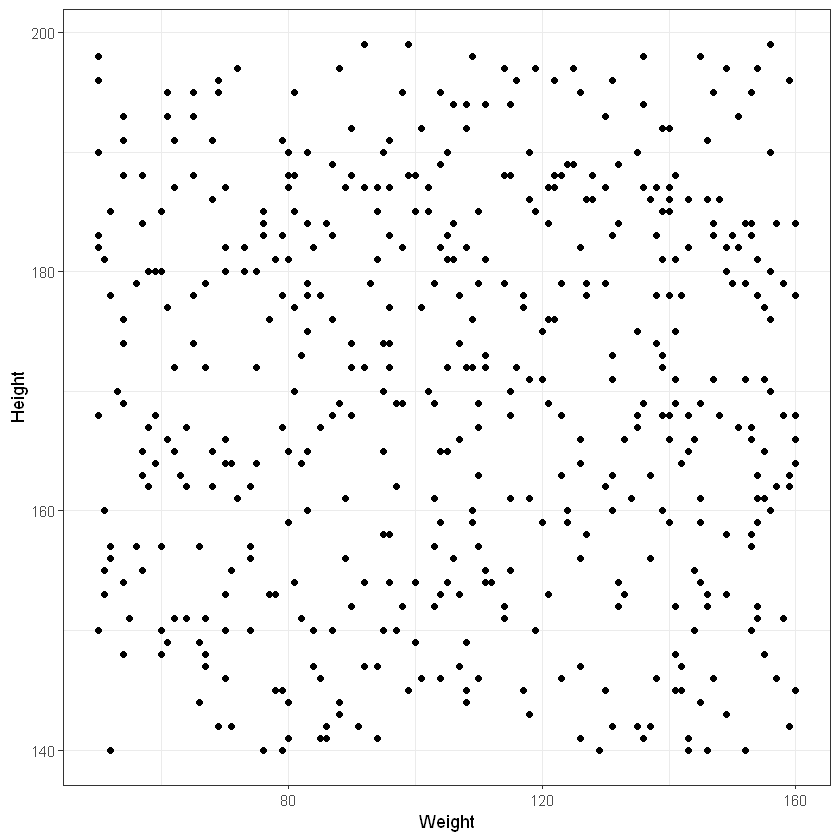

In [218]:
# lets plot weight vs height with ggplot2
gg.plot.scat <- ggplot(index_data, # dataset
                  aes(x=Weight, y=Height)) + # x and y values
      geom_point() 
gg.plot.scat

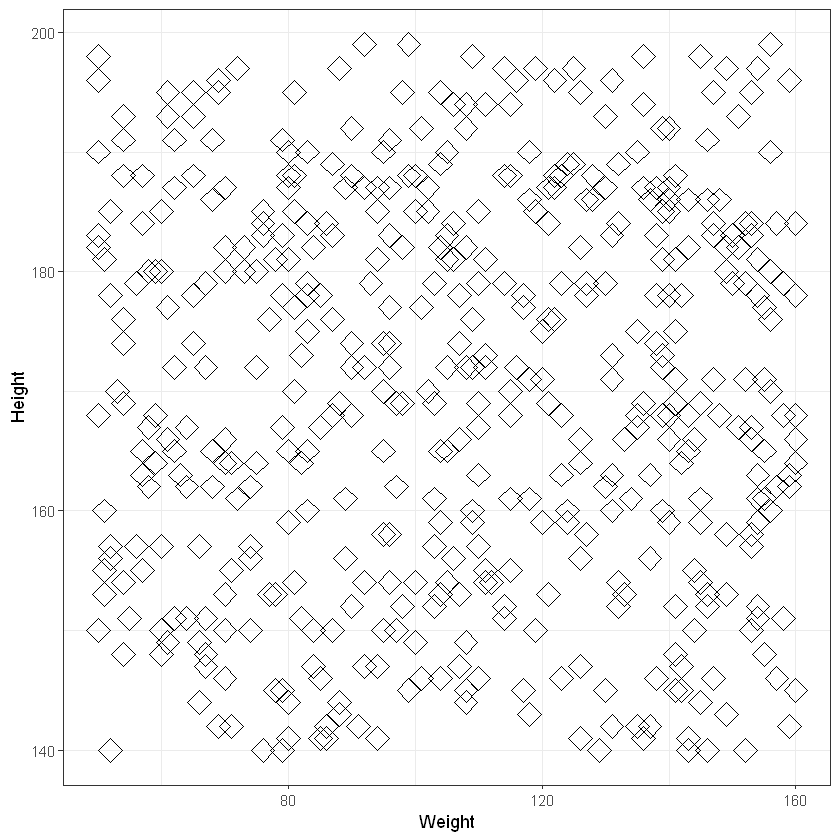

In [221]:
gg.plot.scat <- ggplot(index_data, # dataset
                aes(x=Weight, y=Height)) +
                geom_point(size = 5, shape = 23) # you can change your points size and shape
        # you can see shapes list under the chart
gg.plot.scat

![](assets/images/03/points-symbols.png)

`geom_smooth()` using formula 'y ~ x'



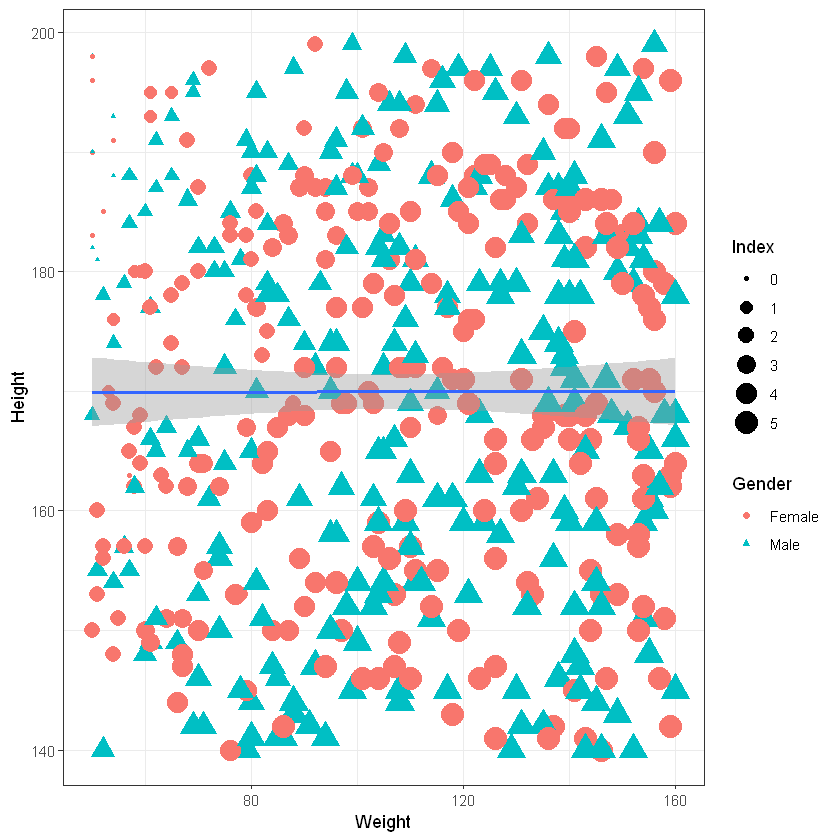

In [224]:
# lest add some geom_point configuration
gg.plot.scat <- gg.plot <- ggplot(index_data, # dataset
                 aes(x=Weight, y=Height)) +
                 geom_point(aes(col = Gender, shape = Gender, size = Index)) + # color and shape based on sex, size of points based on popdensity value
                 geom_smooth(method="lm") # smooth line based on linear regression
gg.plot.scat

# 4. Area charts

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



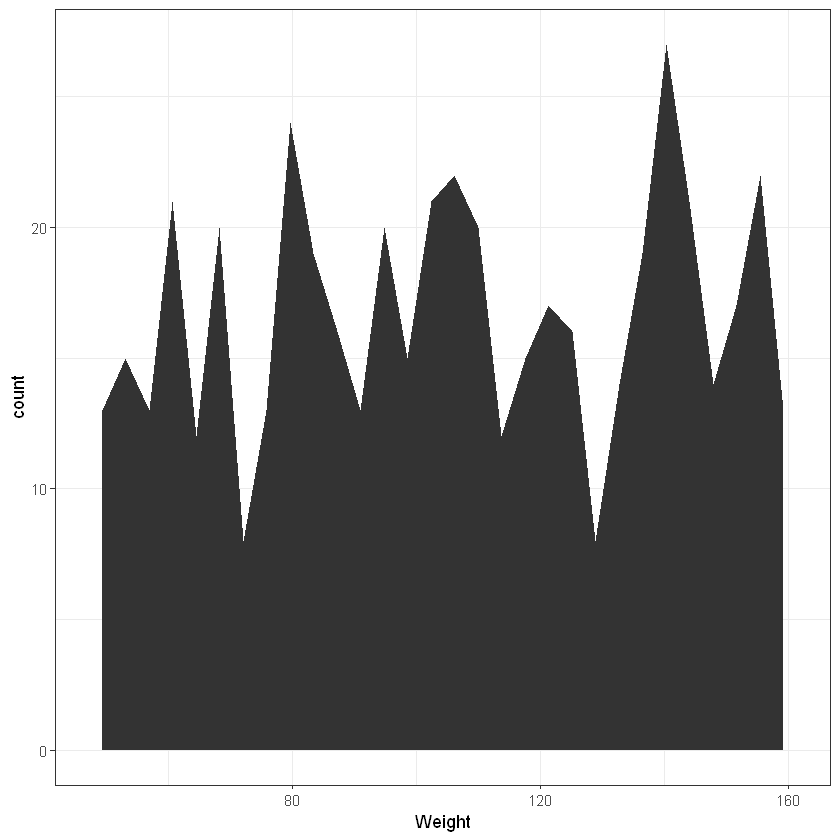

In [225]:
# You can also use area charts
gg.plot.area <- ggplot(index_data, aes(x = Weight)) +
          geom_area(stat = "bin") # init data
gg.plot.area

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



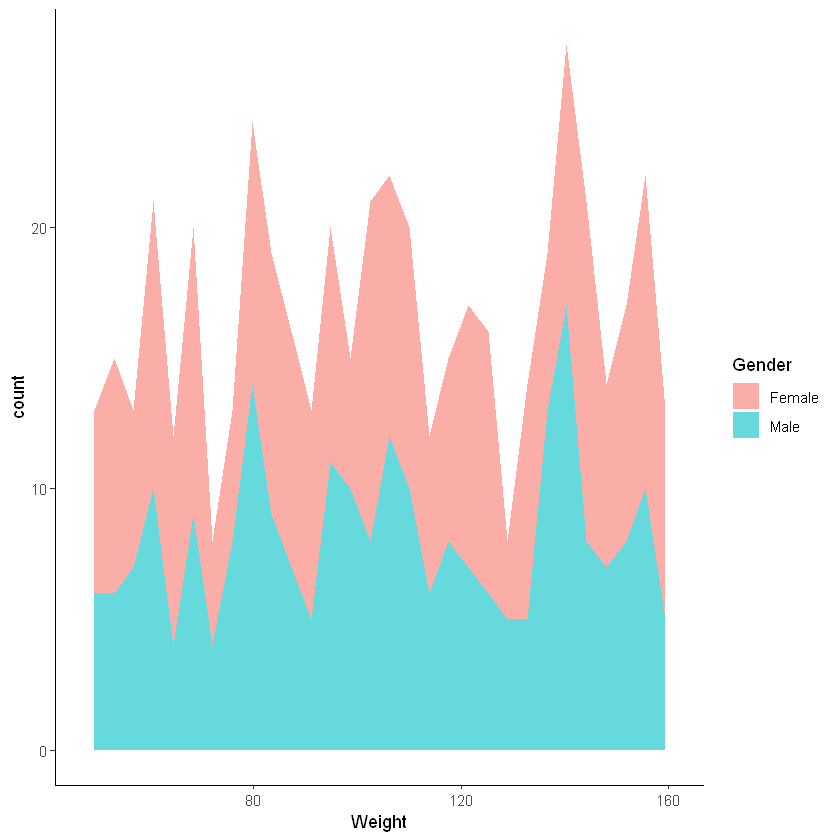

In [227]:
# lets extend this with colorfull areas
gg.plot.area <- ggplot(index_data, aes(x = Weight)) +
        geom_area(aes(fill = Gender), stat ="bin", alpha=0.6) + # add area fill based on sex factor
        theme_classic() # add theme
gg.plot.area

## `geom_density()`: Create a smooth density estimate

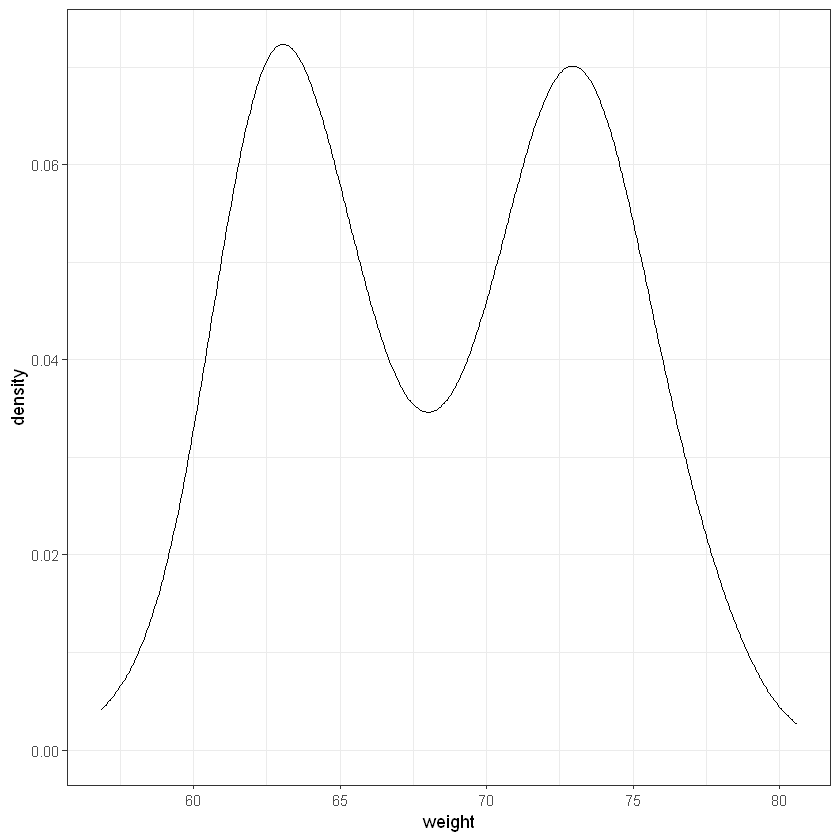

In [167]:
gg.plot.dens <- ggplot(p_data, aes(x = weight)) + 
    geom_density()
gg.plot.dens

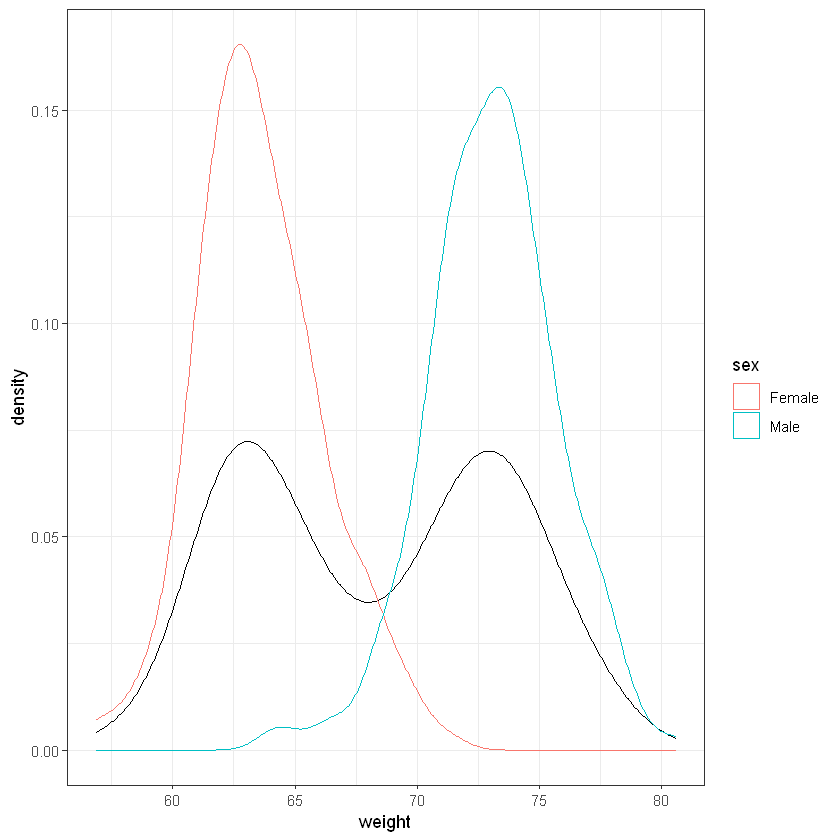

In [168]:
# changing line colors by sex
gg.plot.dens + geom_density(aes(color = sex)) 

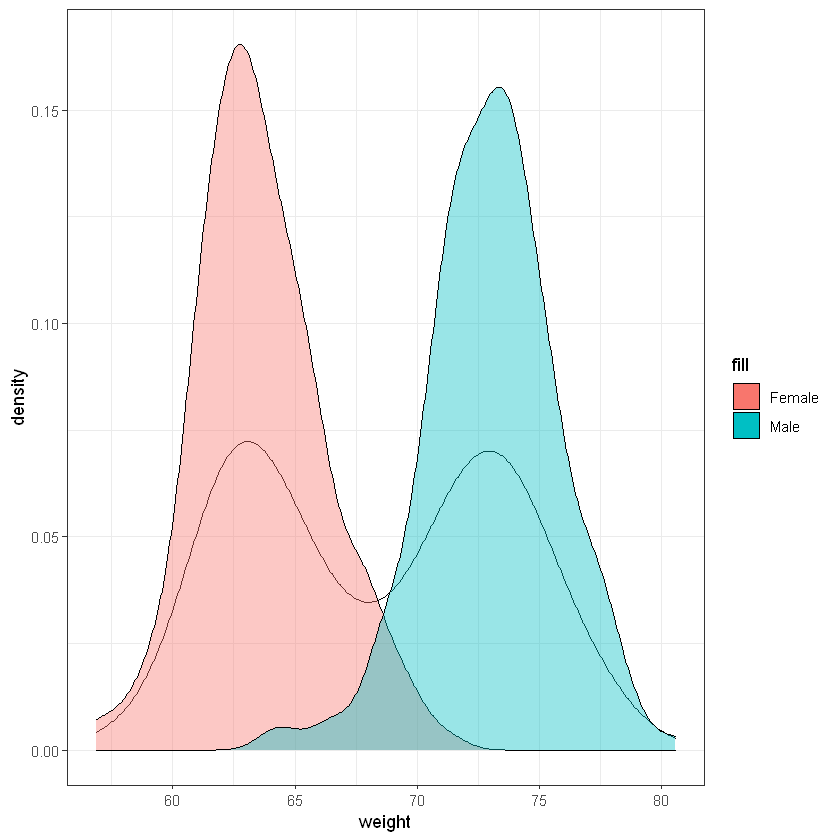

In [169]:
# Change fill color by sex
# Use semi-transparent fill: alpha = 0.4
gg.plot.dens + geom_density(aes(fill = sex), alpha=0.4)

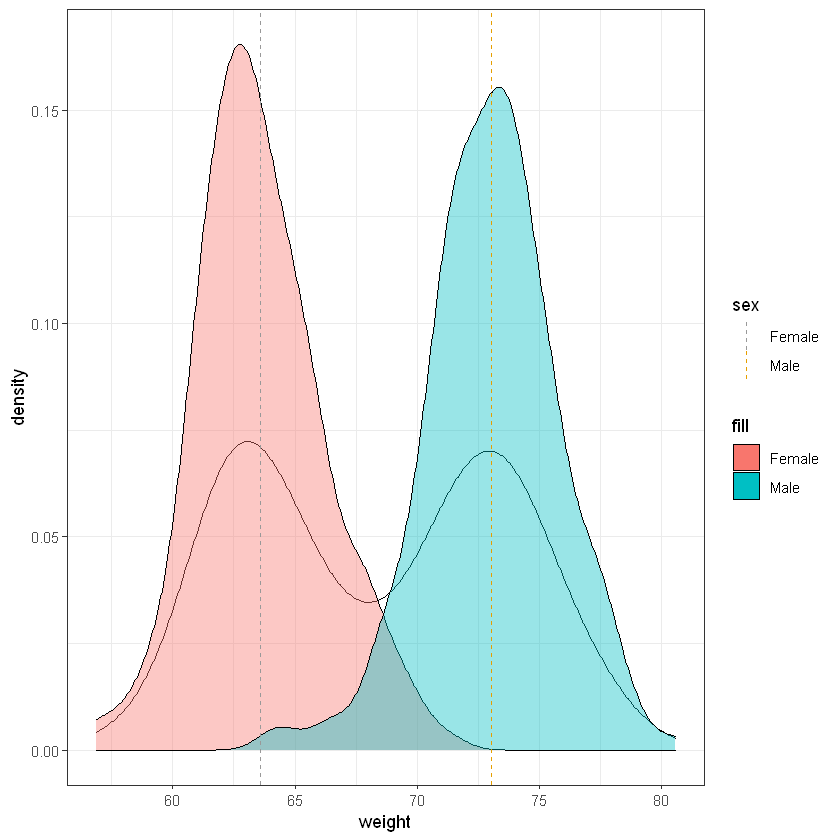

In [171]:
# Add mean line and Change color manually

mean_data <- p_data %>% group_by(sex) %>%
    summarise(mean_weight = mean(weight)) # calculating mean weights for chart_data

gg.plot.dens + geom_density(aes(fill = sex), alpha=0.4) +
  geom_vline(data = mean_data, aes(xintercept=mean_weight, color=sex),  linetype="dashed") + # adding
  scale_color_manual(values=c("#999999", "#E69F00")) # set manual colors

---

# `geom_histogram()`: Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



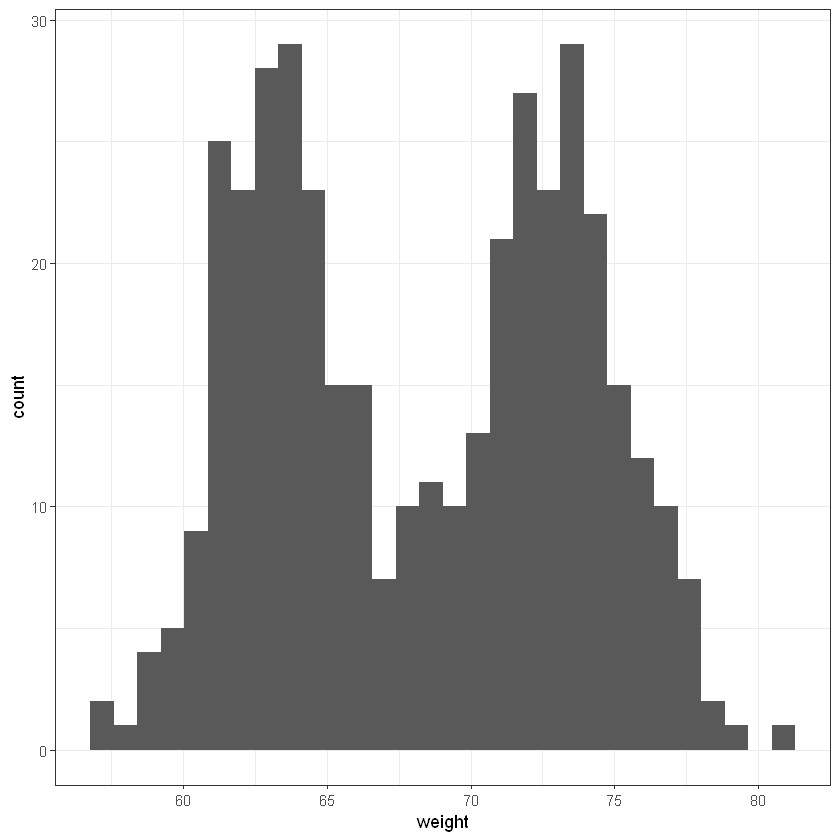

In [172]:
# default histogram is
gg.plot.hist <- ggplot(p_data, aes(x = weight)) + geom_histogram()
gg.plot.hist

---

## References

1. [A Simple Introduction to the Graphing Philosophy of ggplot2](https://www.r-bloggers.com/2014/03/a-simple-introduction-to-the-graphing-philosophy-of-ggplot2/) by Thomas Hopper